In [113]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
def knn(X, y, x, k):
    def find_k_smallest_indices(arr, k):
        indices = list(range(len(arr)))
        for i in range(k):
            min_index = min(range(i, len(arr)), key=lambda x: arr[x])
            indices[i], indices[min_index] = indices[min_index], indices[i]
            arr[i], arr[min_index] = arr[min_index], arr[i]
        return indices[:k]

    distance = np.sqrt(np.sum((X - x) ** 2, axis=1))
    nearest_indices = find_k_smallest_indices(distance.copy(), k)
    nearest_values = y[nearest_indices]
    nearest_distances = distance[nearest_indices]
    weights = 1 / (1e-10 + nearest_distances**2) # I am using weighted average with weights being equal to 1/(distance^2)
    if isinstance(y[0], (int, np.integer)):
        weighted_counts = {}
        for idx, value in enumerate(nearest_values):
            weighted_counts[value] = weighted_counts.get(value, 0) + weights[idx]
        return max(weighted_counts, key=weighted_counts.get)
    else:
        return np.sum(weights * nearest_values) / np.sum(weights)

In [115]:
# Define the function f(x) = x^3 + x / 3. I use this to generate sample data for regression 
def fx(x):
    return x**3 + x / 3

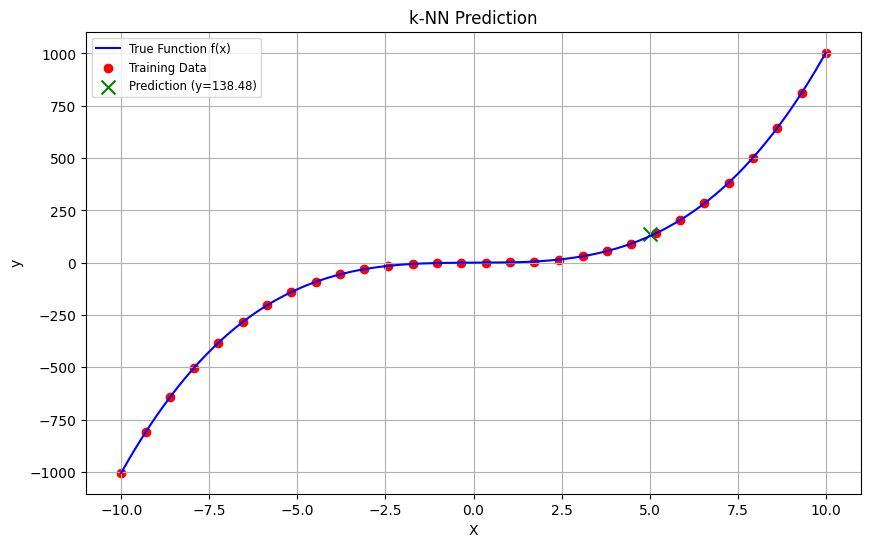

{'True Value (y)': 126.66666666666667,
 'k-NN Predicted Value (y)': 138.4849100464961,
 'Difference': 11.81824337982944}

In [116]:
X = np.linspace(-10, 10, 30).reshape(-1, 1)
y = fx(X.flatten())

# Define test point x=5
x = np.array([5])

k = 10
y_pred = knn(X, y, x, k)

# Calculate the true value for f(x) when x=5 using the function directly
y_true = fx(5)

# Prepare comparison results
comparison = {
    "True Value (y)": y_true,
    "k-NN Predicted Value (y)": y_pred,
    "Difference": abs(y_true - y_pred)
}

# Plot the true function, training data, and prediction for k=5
plt.figure(figsize=(10, 6))

# True function line
X_plot = np.linspace(-10, 10, 200)
plt.plot(X_plot, fx(X_plot), label="True Function f(x)", color="blue", linewidth=1.5)

# Training data points
plt.scatter(X, y, color="red", label="Training Data")

# Predicted value for x=5 with k=5
plt.scatter(5, y_pred, label=f"Prediction (y={y_pred:.2f})", color='green', marker='x', s=100)

# Plot 
plt.xlabel("X")
plt.ylabel("y")
plt.title("k-NN Prediction")
plt.legend(loc="best", fontsize="small")
plt.grid(True)
plt.show()

# Display the comparison
comparison
